<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Visualizing-what-convnets-learn" data-toc-modified-id="Visualizing-what-convnets-learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing what convnets learn</a></span><ul class="toc-item"><li><span><a href="#Visualizing-intermediate-activations" data-toc-modified-id="Visualizing-intermediate-activations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Visualizing intermediate activations</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-a-single-image" data-toc-modified-id="Preprocessing-a-single-image-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Preprocessing a single image</a></span></li><li><span><a href="#Instatiating-a-model-from-an-input-and-list-output-tensors" data-toc-modified-id="Instatiating-a-model-from-an-input-and-list-output-tensors-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Instatiating a model from an input and list output tensors</a></span></li><li><span><a href="#Running-the-model-in-predict-mode" data-toc-modified-id="Running-the-model-in-predict-mode-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Running the model in predict mode</a></span></li><li><span><a href="#Visualizing-the-fourth-channel" data-toc-modified-id="Visualizing-the-fourth-channel-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Visualizing the fourth channel</a></span></li><li><span><a href="#Visualizing-the-seventh-channel" data-toc-modified-id="Visualizing-the-seventh-channel-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Visualizing the seventh channel</a></span></li><li><span><a href="#Visualizing-every-channel-in-every-intermediate-activation" data-toc-modified-id="Visualizing-every-channel-in-every-intermediate-activation-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Visualizing every channel in every intermediate activation</a></span></li></ul></li></ul></li></ul></div>

# Visualizing what convnets learn

It is often said that deep learning models are "black-boxes": learning representations that are difficult to extract and present in a human-readable form. Although this is partially true for certain types of deep-learning models, it is definitely not true for convnets.

The representations learned by convnets are highly amenable to visualization, in large part because **they are representations of visual concepts**

The three most accessible and useful thechniques include:

- *Visualizing intermediate convnet outputs (intermediate activations)* --Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters. 

- *Visualizing convnets filters*--Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.

- *Visualizing heatmaps of class activation in an image*--Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing us to localize objects in images.

## Visualizing intermediate activations

Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input. *The output of a layer is often called its **activation**, the output of the activation function*.

This gives a view into how an input is decomposed into the different filters learned by the network. 

Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model('cats_and_dogs_small_2.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Preprocessing a single image

Get an input image-- a picture of a cat, not part of the images the network was trained on. 

In [4]:
img_path = '/home/ubuntu/data/dogs-vs-cats/cats_and_dogs_small/test/cats/cat.1500.jpg'

In [5]:
from keras.preprocessing import image

In [6]:
import numpy as np

Preprocess the image into a 4D tensor. And remember to use same configurations as how the model was trained on inputs.

In [7]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [8]:
img_tensor.shape

(1, 150, 150, 3)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

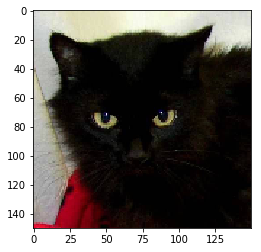

In [10]:
plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. 

### Instatiating a model from an input and list output tensors

In [11]:
from keras import models

In [12]:
# Extract the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

In [13]:
# Create a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. 

### Running the model in predict mode

In [14]:
# Return a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [15]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

### Visualizing the fourth channel 

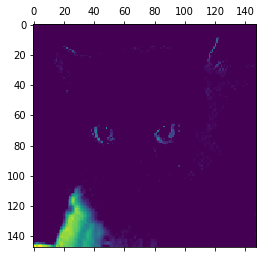

In [16]:
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')

### Visualizing the seventh channel

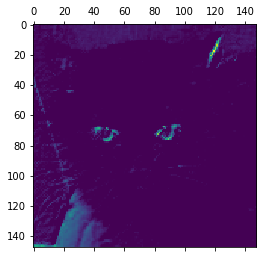

In [17]:
plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis')

### Visualizing every channel in every intermediate activation

In [18]:
# Names of the layers, so we can have them as part of our plot
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)

In [19]:
images_per_row = 16

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


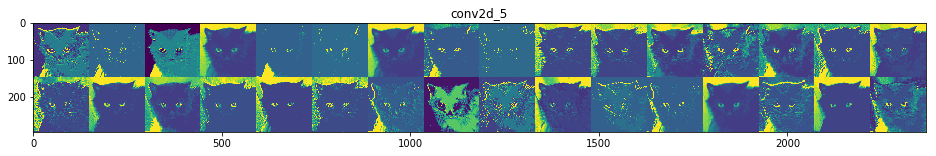

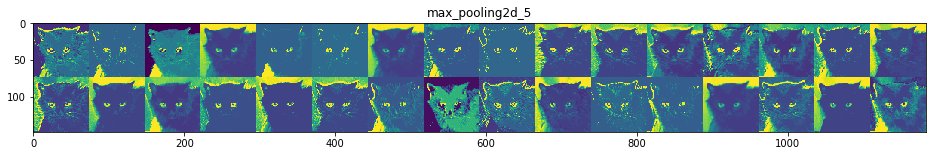

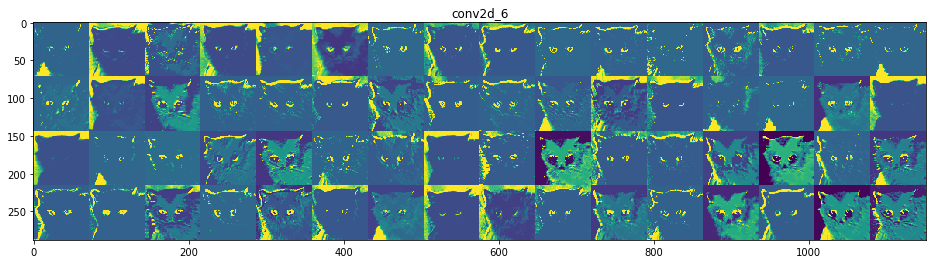

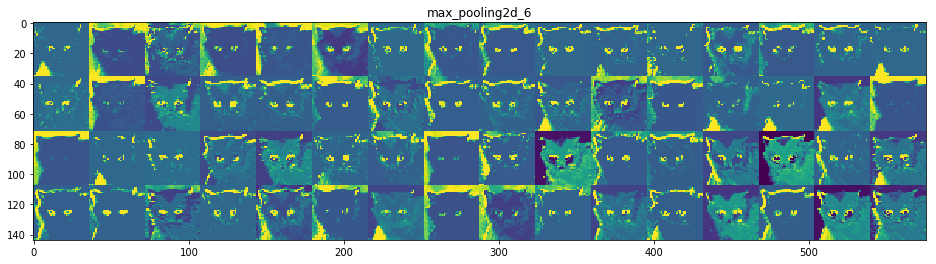

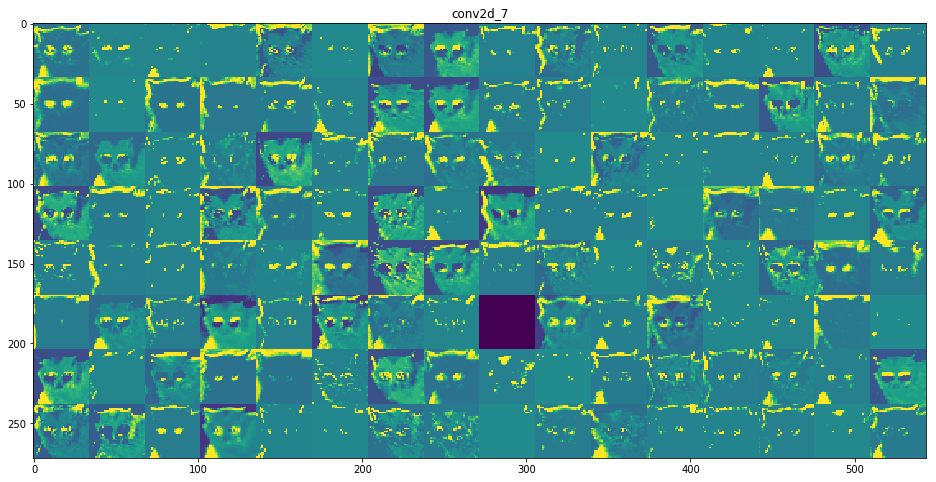

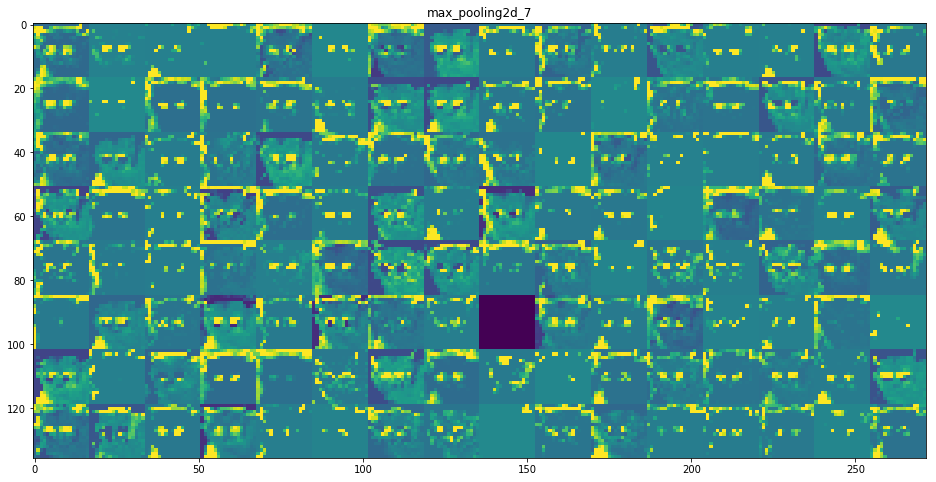

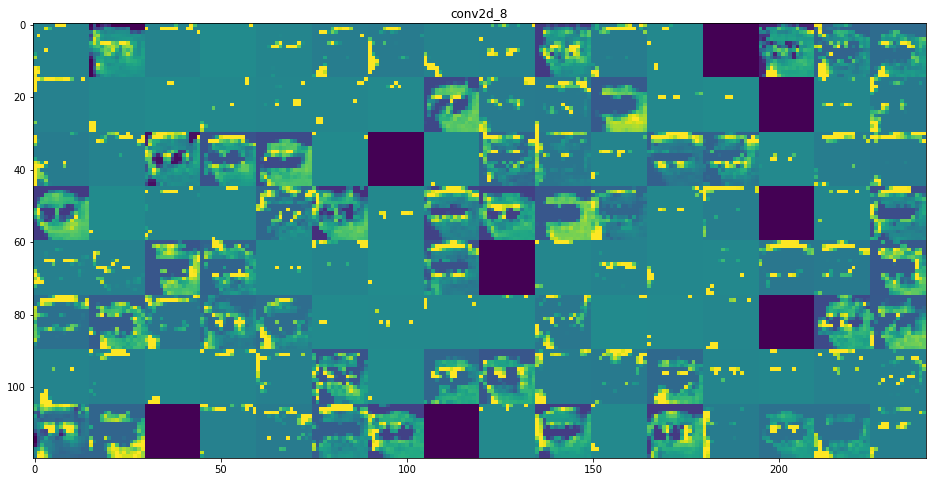

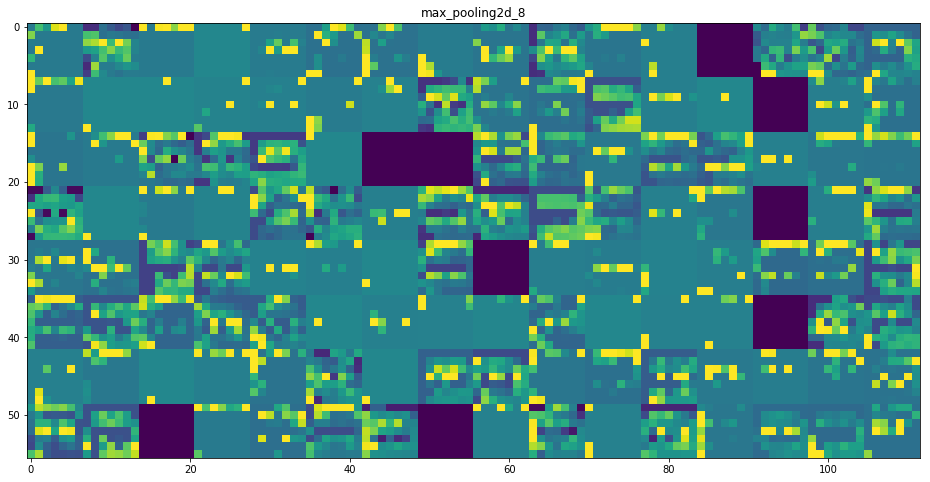

In [20]:
# Display the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    
    # Number of features in the feature map
    n_features = layer_activation.shape[-1]
    
    # The feature map has shape (I, size, size, n_features)
    size = layer_activation.shape[1]
    
    # Tiles the activation channels in this matrix
    n_cols  = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            
            # Post-process the feature to make it visually palatable 
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image  /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
            
    scale = 1./ size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
            
            